In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\Master\\CLASES\\Modulo 4\\Modelos Generativos\\all_stocks_5yr.csv', sep=',')
data

date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]

In [6]:
data.date[2]

'2013-02-12'

In [10]:
#con pivot reformo la tabla y uno por ticker y fecha
df = data.pivot(index='date', columns='Name', values='close')
df

Name            A    AAL     AAP      AAPL    ABBV    ABC    ABT     ACN  \
date                                                                       
2013-02-08  45.08  14.75   78.90   67.8542   36.25  46.89  34.41   73.31   
2013-02-11  44.60  14.46   78.39   68.5614   35.85  46.76  34.26   73.07   
2013-02-12  44.62  14.27   78.60   66.8428   35.42  46.96  34.30   73.37   
2013-02-13  44.75  14.66   78.97   66.7156   35.27  46.64  34.46   73.56   
2013-02-14  44.58  13.99   78.84   66.6556   36.57  46.77  34.70   73.13   
...           ...    ...     ...       ...     ...    ...    ...     ...   
2018-02-01  72.83  53.88  117.29  167.7800  116.34  99.29  62.18  160.46   
2018-02-02  71.25  52.10  113.93  160.5000  115.17  96.02  61.69  156.90   
2018-02-05  68.22  49.76  109.86  156.4900  109.51  91.90  58.73  151.83   
2018-02-06  68.45  51.18  112.20  163.0300  111.20  91.54  58.86  154.69   
2018-02-07  68.06  51.40  109.93  159.5400  113.62  94.22  58.67  155.15   

Name          ADBE    ADI  ...     XL   XLNX    XOM   XRAY    XRX    XYL  \
date                       ...                                             
2013-02-08   39.12  45.70  ...  28.24  37.51  88.61  42.87  31.84  27.09   
2013-02-11   38.64  46.08  ...  28.31  37.46  88.28  42.84  31.96  27.46   
2013-02-12   38.89  46.27  ...  28.41  37.58  88.46  42.87  31.84  27.95   
2013-02-13   38.81  46.26  ...  28.42  37.80  88.67  43.08  32.00  28.26   
2013-02-14   38.61  46.54  ...  28.22  38.44  88.52  42.91  32.12  28.47   
...            ...    ...  ...    ...    ...    ...    ...    ...    ...   
2018-02-01  199.38  91.65  ...  36.79  72.49  89.07  60.73  32.75  74.84   
2018-02-02  195.64  89.11  ...  38.25  70.64  84.53  60.06  31.63  75.66   
2018-02-05  190.27  85.40  ...  37.68  66.97  79.72  58.54  31.38  72.66   
2018-02-06  194.47  88.54  ...  37.34  68.99  78.35  58.46  30.85  71.33   
2018-02-07  192.34  85.35  ...  42.00  66.97  76.94  58.30  31.18  71.79   

Name          YUM     ZBH   ZION    ZTS  
date                                     
2013-02-08  65.30   75.85  24.14  33.05  
2013-02-11  64.55   75.65  24.21  33.26  
2013-02-12  64.75   75.44  24.49  33.74  
2013-02-13  64.41   76.00  24.74  33.55  
2013-02-14  63.89   76.34  24.63  33.27  
...           ...     ...    ...    ...  
2018-02-01  83.98  128.19  54.98  77.82  
2018-02-02  82.63  125.79  54.15  76.78  
2018-02-05  79.80  123.18  51.65  73.83  
2018-02-06  80.58  122.30  52.52  73.27  
2018-02-07  80.13  120.78  54.02  73.86  

[1259 rows x 505 columns]

In [14]:
df.dropna(axis=1)
df

Name            A    AAL     AAP      AAPL    ABBV    ABC    ABT     ACN  \
date                                                                       
2013-02-08  45.08  14.75   78.90   67.8542   36.25  46.89  34.41   73.31   
2013-02-11  44.60  14.46   78.39   68.5614   35.85  46.76  34.26   73.07   
2013-02-12  44.62  14.27   78.60   66.8428   35.42  46.96  34.30   73.37   
2013-02-13  44.75  14.66   78.97   66.7156   35.27  46.64  34.46   73.56   
2013-02-14  44.58  13.99   78.84   66.6556   36.57  46.77  34.70   73.13   
...           ...    ...     ...       ...     ...    ...    ...     ...   
2018-02-01  72.83  53.88  117.29  167.7800  116.34  99.29  62.18  160.46   
2018-02-02  71.25  52.10  113.93  160.5000  115.17  96.02  61.69  156.90   
2018-02-05  68.22  49.76  109.86  156.4900  109.51  91.90  58.73  151.83   
2018-02-06  68.45  51.18  112.20  163.0300  111.20  91.54  58.86  154.69   
2018-02-07  68.06  51.40  109.93  159.5400  113.62  94.22  58.67  155.15   

Name          ADBE    ADI  ...     XL   XLNX    XOM   XRAY    XRX    XYL  \
date                       ...                                             
2013-02-08   39.12  45.70  ...  28.24  37.51  88.61  42.87  31.84  27.09   
2013-02-11   38.64  46.08  ...  28.31  37.46  88.28  42.84  31.96  27.46   
2013-02-12   38.89  46.27  ...  28.41  37.58  88.46  42.87  31.84  27.95   
2013-02-13   38.81  46.26  ...  28.42  37.80  88.67  43.08  32.00  28.26   
2013-02-14   38.61  46.54  ...  28.22  38.44  88.52  42.91  32.12  28.47   
...            ...    ...  ...    ...    ...    ...    ...    ...    ...   
2018-02-01  199.38  91.65  ...  36.79  72.49  89.07  60.73  32.75  74.84   
2018-02-02  195.64  89.11  ...  38.25  70.64  84.53  60.06  31.63  75.66   
2018-02-05  190.27  85.40  ...  37.68  66.97  79.72  58.54  31.38  72.66   
2018-02-06  194.47  88.54  ...  37.34  68.99  78.35  58.46  30.85  71.33   
2018-02-07  192.34  85.35  ...  42.00  66.97  76.94  58.30  31.18  71.79   

Name          YUM     ZBH   ZION    ZTS  
date                                     
2013-02-08  65.30   75.85  24.14  33.05  
2013-02-11  64.55   75.65  24.21  33.26  
2013-02-12  64.75   75.44  24.49  33.74  
2013-02-13  64.41   76.00  24.74  33.55  
2013-02-14  63.89   76.34  24.63  33.27  
...           ...     ...    ...    ...  
2018-02-01  83.98  128.19  54.98  77.82  
2018-02-02  82.63  125.79  54.15  76.78  
2018-02-05  79.80  123.18  51.65  73.83  
2018-02-06  80.58  122.30  52.52  73.27  
2018-02-07  80.13  120.78  54.02  73.86  

[1259 rows x 505 columns]

<AxesSubplot:xlabel='date'>

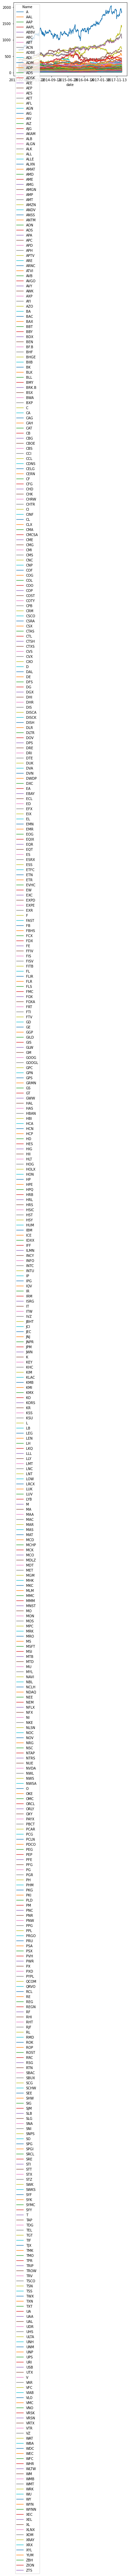

In [15]:
df.plot()

In [ ]:
columns = data.Name.unique()
df = pd.DataFrame()
for date in data.index():
    